In [1]:
import numpy as np

In [20]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def f(W,x,layers):
    a=x
    for l in range(layers-1):
        w = W[l];
        #print(w.shape)
        a = sigmoid(np.matmul(np.transpose(w),a))
    #print('a value before last layer:',a)
    a = sigmoid(W[layers-1,0,0]*a[0]+W[layers-1,1,0]*a[1])
    #print('a value after last layer:',a)
    return a;

def error_func(y,y_hat):
    return y*np.log(y_hat)+(1-y)*np.log(1-y_hat)

def CEO(nj_list,tau,mean,sigma,layers,X,Y,rho):
    complete_weights = np.ones((tau,1,layers,2,2))
    error_vals=[];
    for i in range(tau):
        W = np.ones((nj_list[i],layers,2,2))*0.5
        W[:,-1,:,-1] = 0
        objective_function_list = np.zeros(nj_list[i])
        for j in range(nj_list[i]):
            for l in range(layers):
                w11,w12 = np.random.normal(mean[l][0],sigma[l][0],2)
                w21,w22 = np.random.normal(mean[l][1],sigma[l][0],2)
                W[j][l][0] = np.array([w11,w12])
                W[j][l][1] = np.array([w21,w22])
            W[:,-1,:,-1] = 0
            error = 0
            #print(X,Y)
            for x,y in zip(X,Y):
                a = f(W[j],x,layers)
                error = error + np.abs(error_func(y,a))
            objective_function_list[j] = error
        #print('Objective function list:',objective_function_list)
        #complete_weights[i] = W
        considered_indices = np.argsort(objective_function_list)
        mean_error = np.mean(objective_function_list[considered_indices[:int(rho*nj_list[i])]])
        error_vals.append(mean_error)
        for l in range(layers-1):
            mean[l] = np.mean(np.mean(W[considered_indices[:int(rho*nj_list[i])],l],0),1)#np.mean(W[considered_indices[:int(rho*nj_list[i])],l,0])
        print(mean.shape)
        mean[-1][0] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[0][0]
        mean[-1][1] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[1][0]
        
    return mean,error_vals
X = np.array([[1,1],[1,2]])
y = np.array([[1],[0]])
list_of_tau = [100,150,190,80,50,150,200,300,80,70]
mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)
(3, 2)


[1.400547174577824, 1.3921123347517061, 1.3931500757308957, 1.3893725537391284, 1.3892992200531584, 1.386198606165993, 1.3852948969287258, 1.3858862317913767, 1.384546017924558, 1.381399471643682]


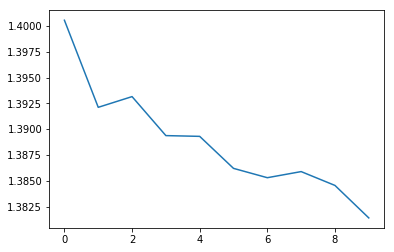

In [21]:
print(error_vals)
from matplotlib import pyplot as plt
plt.plot(error_vals)